### Outliers

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv("C:/Users/korla/Desktop/krish codes/Feature Engineering/Feature-Engineering-Live-sessions-master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
df.Age.isnull().sum()

177

Text(0.5, 1.0, 'Age_normal_distribution')

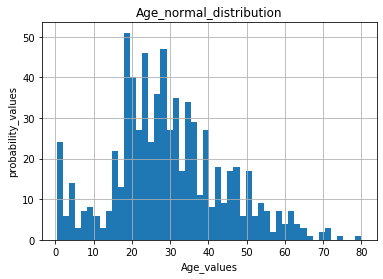

In [100]:
a1 = df.Age.hist(bins=50)
a1.set_xlabel('Age_values')
a1.set_ylabel('probability_values')
a1.set_title("Age_normal_distribution")

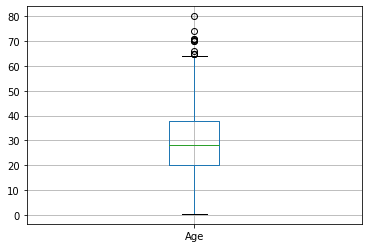

In [101]:
df.boxplot(column="Age")

In [84]:
# large amounts of outliers are present in Age Attributes

In [102]:
df1 = pd.read_csv("C:/Users/korla/Desktop/krish codes/Feature Engineering/Feature-Engineering-Live-sessions-master/titanic.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
median = df1.Age.median()

In [104]:
median

28.0

In [105]:
df1.Age.fillna(median,inplace = True)

In [106]:
df1.Age.isnull().sum()

0

Text(0, 0.5, 'probabilit_values')

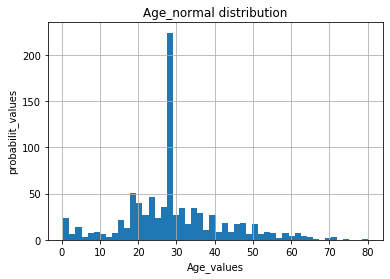

In [107]:
a = df1.Age.hist(bins=50)
a.set_title('Age_normal distribution')
a.set_xlabel('Age_values')
a.set_ylabel('probabilit_values')


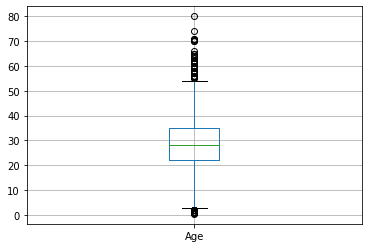

In [108]:
df1.boxplot(column = 'Age')

In [125]:
df = pd.read_csv("C:/Users/korla/Desktop/krish codes/Feature Engineering/Feature-Engineering-Live-sessions-master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


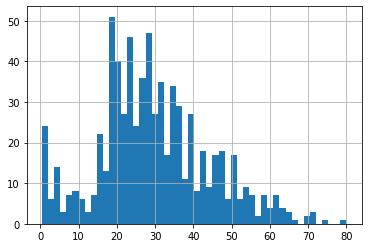

In [126]:
df.Age.hist(bins=50)

In [127]:
higher_range = df['Age'].mean() + 3*df['Age'].std()
lower_range = df['Age'].mean() - 3*df['Age'].std()
print(higher_range)
print(lower_range)
print(df.Age.mean())

73.27860964406095
-13.88037434994331
29.69911764705882


In [128]:
data = df.copy()

In [129]:
data.loc[data['Age']>=73,'Age']=73

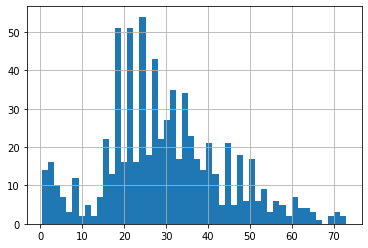

In [131]:
data.Age.hist(bins=50)

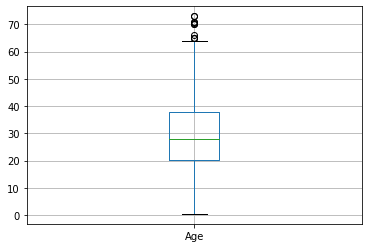

In [132]:
data.boxplot(column='Age')

In [133]:
# the outliers are get managed by replacing with the help of Normal distribution mean and standard deviations values

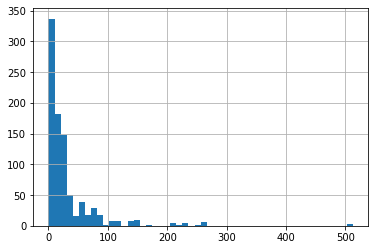

In [134]:
df.Fare.hist(bins=50)

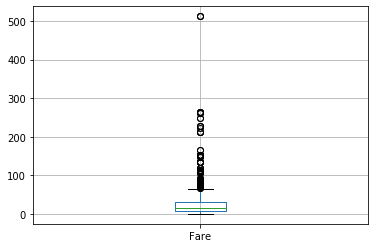

In [151]:
df.boxplot(column='Fare')

In [137]:
# the graph is completely Right skewed
# so mean and SD will not work in such a case so we need to work with IQR(interQuartile Range)

In [138]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [139]:
IQR

23.0896

In [140]:
upper_layer_range = df.Fare.quantile(0.75) + (IQR*1.5)
lower_layer_range = df.Fare.quantile(0.75) - (IQR*1.5)


In [141]:
print(upper_layer_range)
print(lower_layer_range)

65.6344
-3.6343999999999994


In [142]:
# the value with 65 are outliers but to find the complete extreme values we need to multiply IQR with 3

In [143]:
upper_layer_range1 = df.Fare.quantile(0.75) + (IQR*3)
lower_layer_range1 = df.Fare.quantile(0.75) - (IQR*3)


In [144]:
print(upper_layer_range1)
print(lower_layer_range1)

100.2688
-38.2688


In [145]:
# the value above 100 are completely outliers

In [153]:
data1 = df.copy()

In [154]:
data1.loc[data1['Fare']>=100,'Fare']=100

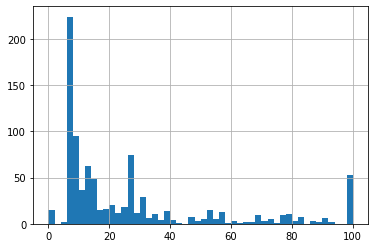

In [155]:
data1.Fare.hist(bins=50)

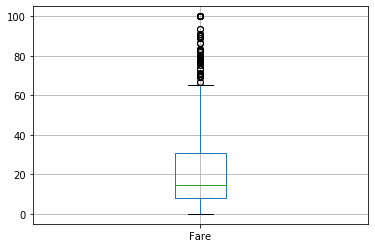

In [157]:
data1.boxplot(column="Fare")

In [158]:
# The outliers get managed 